# Project Studi Case : Prediction Consumers Fashion Retail

## Understanding Business 

Dataset yang digunakan yaitu [Consumer Fashion Retail](https://archive.ics.uci.edu/dataset/352/online+retail). membangun model machine learning untuk memprediksi Konsumen Retail Fashion yang berpotensi churn

| Variable Name | Role     | Type       | Description                                             | Units   | Missing Values |
|---------------|----------|------------|---------------------------------------------------------|---------|----------------|
| InvoiceNo     | ID       | Categorical| A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation | - | no |
| StockCode     | ID       | Categorical| A 5-digit integral number uniquely assigned to each distinct product | - | no |
| Description   | Feature  | Categorical| Product name | - | no |
| Quantity      | Feature  | Integer    | The quantities of each product (item) per transaction  | - | no |
| InvoiceDate   | Feature  | Date       | The day and time when each transaction was generated   | - | no |
| UnitPrice     | Feature  | Continuous | Product price per unit                                  | sterling | no |
| CustomerID    | Feature  | Categorical| A 5-digit integral number uniquely assigned to each customer | - | no |
| Country       | Feature  | Categorical| The name of the country where each customer resides     | - | no |


# Smart Question

1. Specific:
   - Apa jenis produk yang paling banyak terjual, berdasarkan StockCode?
   
2. Measurable:
   - Berapa rata-rata jumlah produk yang terjual dalam setiap transaksi?

3. Action-oriented:
   - Dapatkah kita mengklasifikasikan pelanggan berdasarkan negara tempat mereka tinggal?

4. Relevant:
   - Seberapa pentingnya pemahaman pola pembelian pelanggan dalam meningkatkan retensi pelanggan?

5. Time-bound:
   - Bisakah kita mengidentifikasi periode waktu tertentu yang memiliki peningkatan atau penurunan signifikan dalam jumlah transaksi?

# Importing Library

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import matplotlib.ticker as ticker
import missingno as ms
import warnings


warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.style.use('Solarize_Light2')

# Data Preparation

## Gathering Data

In [137]:
# # fetch dataset
# online_retail = fetch_ucirepo(id=352)

In [138]:
# df_metadata = online_retail.metadata

# print(df_metadata)

In [139]:
# df_variables = online_retail.metadata

# print(df_variables)

In [140]:
df = pd.read_excel("./data/Online Retail.xlsx")

In [141]:
print("Data Para Konsumen Fashion Retail : ",df.head(10))

Data Para Konsumen Fashion Retail :    InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0

## Assesing Data

### Infomation Tabel Consumers Fashion Retail

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Terdapat 541,909 entri dalam dataset ini.
- Kolom Description memiliki 1,454 nilai yang hilang (null).
- Kolom CustomerID memiliki 135,080 nilai yang hilang (null), yang berarti sebagian besar transaksi tidak terkait dengan pelanggan tertentu.
- Data ini memiliki beberapa tipe data, termasuk objek (string), integer, float, dan datetime.

Missing Value

Kolom Description dan CustomerID

In [143]:
print("DataFrame Consumers Fashion Retail : ")
print(df.isna().sum())

DataFrame Consumers Fashion Retail : 


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<Axes: >

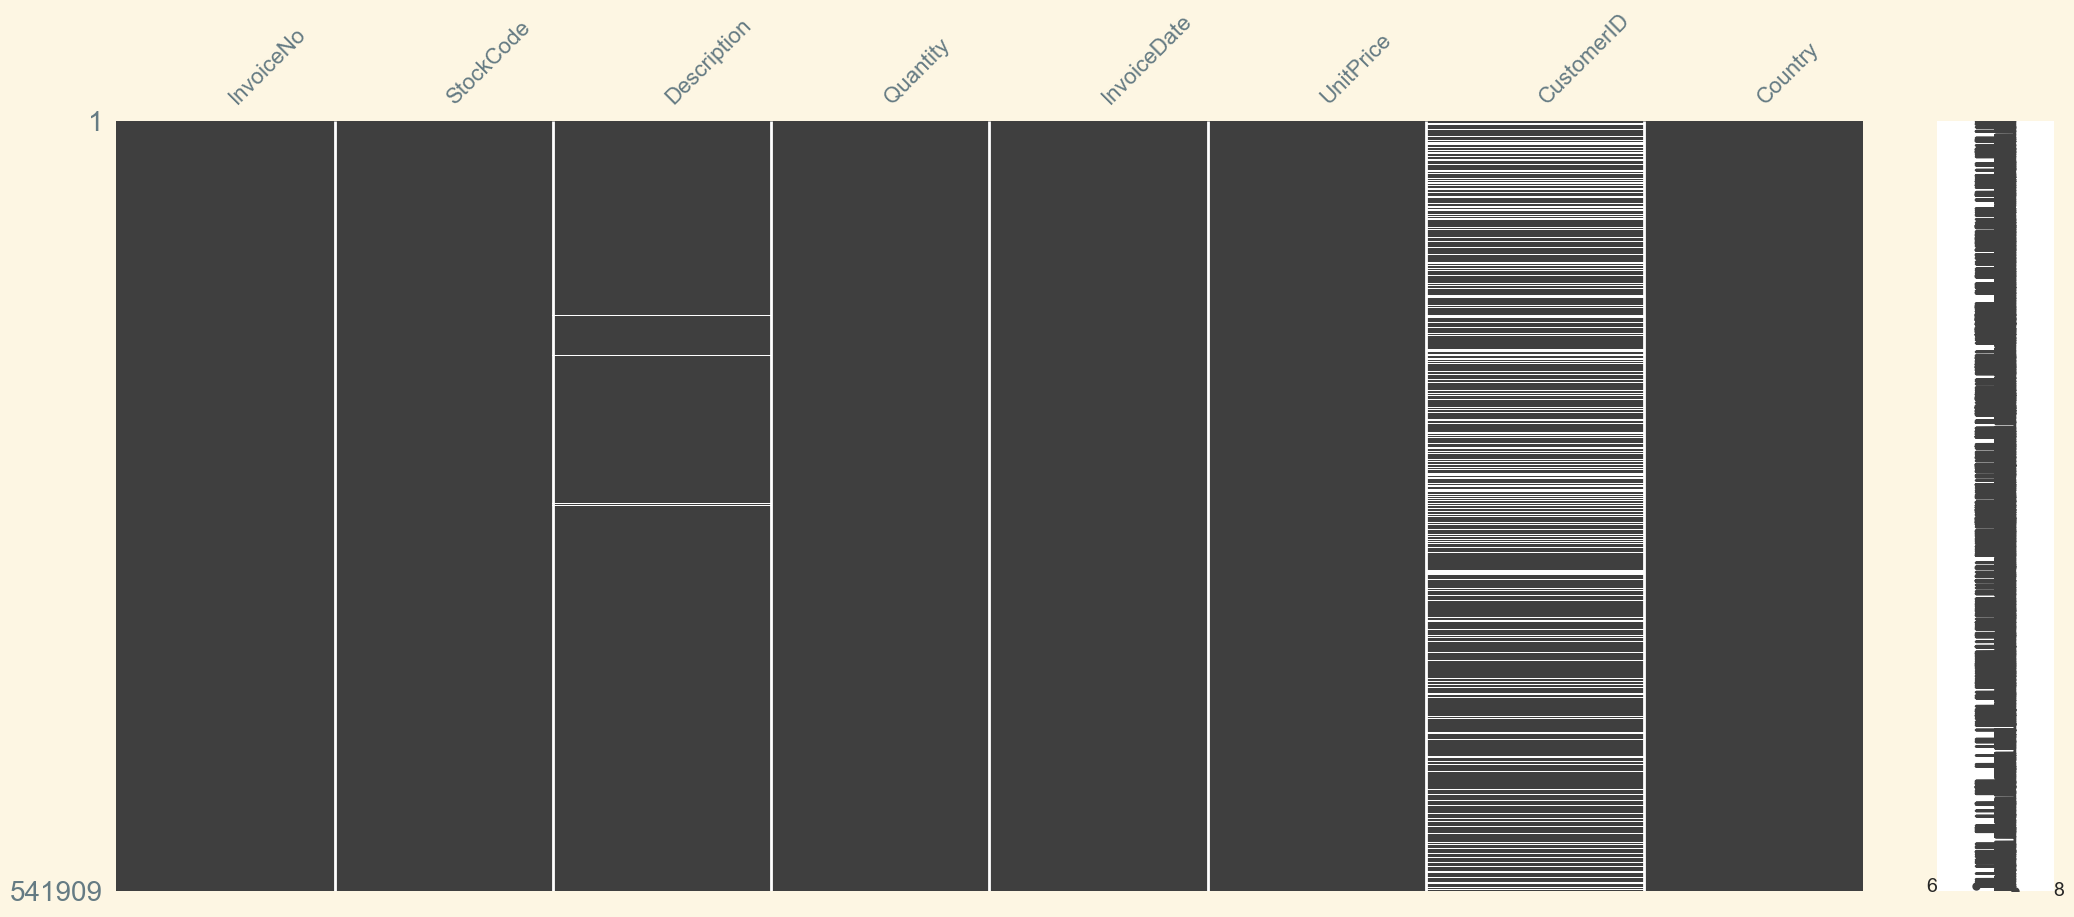

In [144]:
ms.matrix(df)

In [145]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
398803,571257,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,1,2011-10-14 17:17:00,5.79,NaN,United Kingdom
249875,558926,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2011-07-05 10:21:00,0.85,17469.0,United Kingdom
504160,578943,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,2,2011-11-27 13:35:00,3.29,15009.0,United Kingdom
500716,578805,20675,BLUE POLKADOT BOWL,8,2011-11-25 12:57:00,1.25,16401.0,United Kingdom
279426,561322,23202,JUMBO BAG VINTAGE LEAF,10,2011-07-26 13:03:00,2.08,15203.0,United Kingdom
461090,575930,23355,HOT WATER BOTTLE KEEP CALM,1,2011-11-11 17:58:00,10.79,NaN,United Kingdom
424843,573287,21259,VICTORIAN SEWING BOX SMALL,2,2011-10-28 14:42:00,5.95,14194.0,United Kingdom
513802,579571,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-11-30 11:48:00,1.25,16657.0,United Kingdom
52869,540821,22814,CARD PARTY GAMES,1,2011-01-11 13:16:00,0.85,NaN,United Kingdom
46119,540352,21030,SPACE CADET RED,1,2011-01-06 14:27:00,0.85,NaN,United Kingdom


Duplicated Data

In [146]:
print('Jumlah Duplikasi : ', df.duplicated().sum())

Jumlah Duplikasi :  5268


Descriptive analysis Statistic

In [147]:
df.describe().style.background_gradient(cmap='RdPu')

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,nan,96.759853,1713.600303


- jumlah data entries ada : 541909 Data
- Q1 dan Q3 Quantity : 1.25 and 4.13
- Standard Deviation Quantity : 218.08
- mean Quantity : 9.55%
- mean UnitPrice : 4.61% 
- mean CustomerID : 15287 Customer

### Cleaning Data

#### Metode Imputation

Kolom Description missing values 1454

In [148]:
df[df.Description .isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [149]:
df.Description.value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

In [150]:
# df['Description'].fillna(df['Description'].mean(), inplace=True)
df['Description'].fillna('Unknown', inplace=True)

print(df.isna().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Kolom Customer missing values 135.080

In [151]:
df[df.CustomerID .isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Unknown,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [152]:
df.CustomerID.value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [153]:
df.dropna(subset=['CustomerID'], inplace=True)

In [154]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [156]:
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True, drop=True)

print("Jumlah Data yang duplicate", df.duplicated().sum())

Jumlah Data yang duplicate 0


In [157]:
# Mengkoreksi nilai negatif pada Quantity menjadi nilai positif
df['Quantity'] = df['Quantity'].apply(lambda x: max(0, x))

# Mengkoreksi nilai negatif pada UnitPrice menjadi nilai positif
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: max(0, x))

In [158]:
df.describe().style.background_gradient(cmap='RdPu')

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.863134,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,0.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,179.581848,nan,69.764035,1714.006089


# Exploratory Data Analysis (EDA)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.5+ MB


Lakukan analisis untuk mengidentifikasi jenis produk yang paling banyak terjual, dengan memperhatikan kolom StockCode. Anda dapat menggunakan teknik seperti penghitungan jumlah penjualan untuk setiap StockCode dan menentukan yang memiliki nilai tertinggi.

In [160]:
# Focus on StockCode and Quantity columns
df_stock_quantity = df[["StockCode", "Quantity"]]

# Calculate total quantity sold for each StockCode
stock_quantity_sold = df_stock_quantity.groupby(
    "StockCode")["Quantity"].sum().reset_index()

# Sort by total quantity sold in descending order
stock_quantity_sold = stock_quantity_sold.sort_values(
    "Quantity", ascending=False)

# Top 10 StockCodes with highest total quantity sold
top_10_stockcodes = stock_quantity_sold.head(10)

print("Top 10 StockCodes with highest total quantity sold:")
print(top_10_stockcodes)

Top 10 StockCodes with highest total quantity sold:
     StockCode  Quantity
2333     23843     80995
1931     23166     77916
2506     84077     54319
1022     22197     49160
3360    85099B     46078
3366    85123A     36763
2610     84879     35263
355      21212     33670
1853     23084     27153
1286     22492     26076


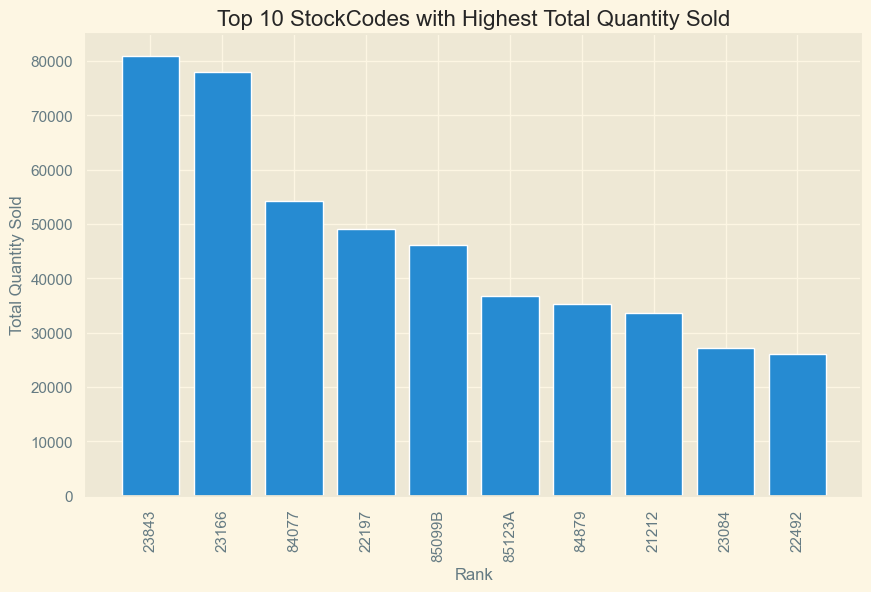

In [161]:
# Plot bar chart of top 10 StockCodes

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_stockcodes)), top_10_stockcodes["Quantity"])
plt.xlabel("Rank")
plt.ylabel("Total Quantity Sold")
plt.title("Top 10 StockCodes with Highest Total Quantity Sold")

# Add StockCode labels to each bar
plt.xticks(range(len(top_10_stockcodes)),
                top_10_stockcodes["StockCode"], rotation=90)

plt.show()

Hitung rata-rata jumlah produk yang terjual dalam setiap transaksi dengan menggunakan kolom Quantity. Dengan demikian, Anda dapat memperoleh angka yang konkrit untuk mengetahui berapa banyak produk yang biasanya terjual dalam setiap transaksi.

In [162]:
# Menghitung rata-rata jumlah produk yang terjual dalam setiap transaksi
average_quantity = df.groupby('InvoiceNo')['Quantity'].sum().mean()

print("Rata-rata jumlah produk yang terjual dalam setiap transaksi:", average_quantity)

Rata-rata jumlah produk yang terjual dalam setiap transaksi: 232.8024335286165


In [163]:
# import plotly.express as px

# # Load dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
# df = pd.read_excel(url)

# # Hitung rata-rata jumlah produk yang terjual dalam setiap transaksi
# average_quantity = df.groupby('InvoiceNo')['Quantity'].sum().mean()

# print("Rata-rata jumlah produk yang terjual dalam setiap transaksi:", average_quantity)

# # Visualisasi menggunakan Plotly Express
# fig = px.histogram(df.groupby('InvoiceNo')['Quantity'].sum(), x='Quantity',
#                    title='Distribution of Quantity Sold per Transaction',
#                    labels={'Quantity': 'Number of Products Sold'})
# fig.update_layout(bargap=0.1)
# fig.show()

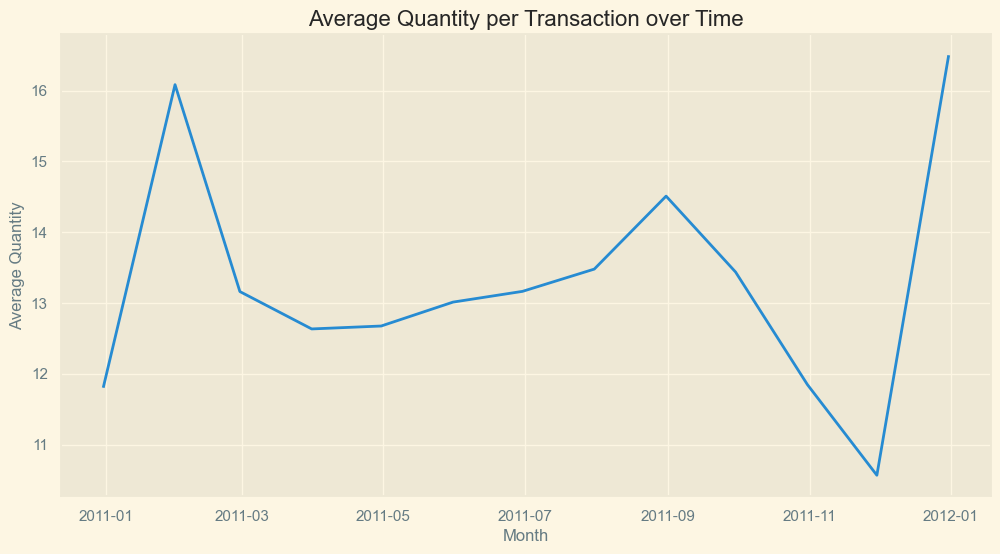

In [164]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_monthly_avg = df.resample('M', on='InvoiceDate')['Quantity'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly_avg.index, y=df_monthly_avg.values)
plt.title("Average Quantity per Transaction over Time")
plt.xlabel("Month")
plt.ylabel("Average Quantity")
plt.show()

Lakukan pengelompokan pelanggan berdasarkan negara tempat mereka tinggal.
Dengan melakukan analisis ini, Anda dapat mengidentifikasi apakah ada perbedaan dalam pola pembelian antara pelanggan dari negara yang berbeda.

In [169]:
customer_country = df.groupby('CustomerID')['Country'].first().reset_index()

print(customer_country.head())

   CustomerID         Country
0     12346.0  United Kingdom
1     12347.0         Iceland
2     12348.0         Finland
3     12349.0           Italy
4     12350.0          Norway


In [170]:
country_distribution = customer_country['Country'].value_counts()
print(country_distribution.head())

Country
United Kingdom    3950
Germany             95
France              87
Spain               29
Belgium             24
Name: count, dtype: int64


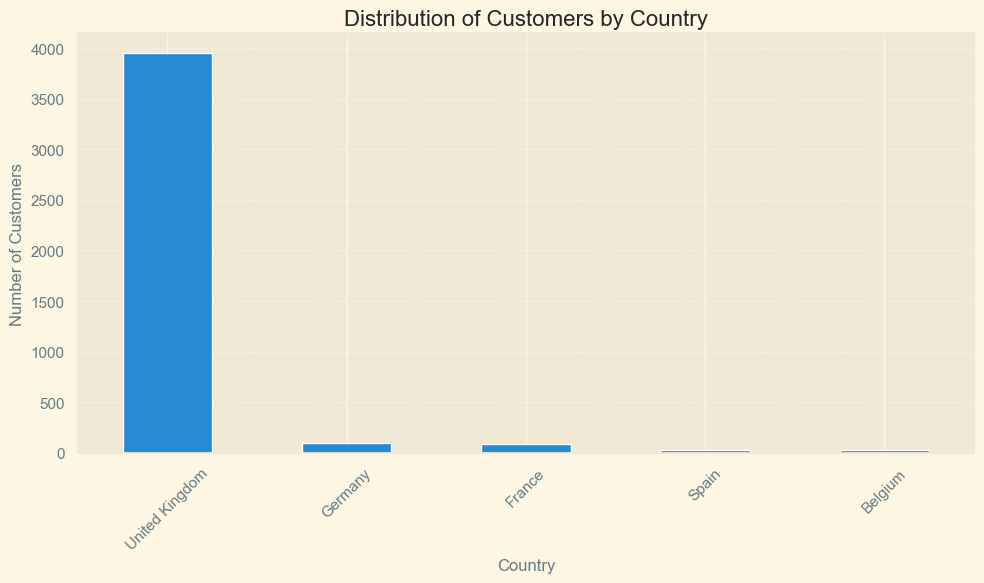

In [171]:
plt.figure(figsize=(10, 6))
country_distribution.head().plot(kind='bar')
plt.title('Distribution of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()